# Proyek Analisis Data: [E-Commerce Public]
- **Nama:** [Aryanti Raihana Thamrin]
- **Email:** [aryantiraihana@gmail.com]
- **ID Dicoding:** [hanaaryanti]

## Menentukan Pertanyaan Bisnis

- Kategori produk apa yang memiliki rating review paling baik dan buruk?
- Apakah ada pola keterlambatan pengiriman berdasarkan kategori keterlambatan?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip freeze requirements.txt

altair==5.5.0
anyio==4.8.0
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==3.0.0
async-lru==2.0.4
attrs==25.1.0
babel==2.17.0
beautifulsoup4==4.13.3
bleach==6.2.0
blinker==1.9.0
cachetools==5.5.2
certifi==2025.1.31
cffi==1.17.1
charset-normalizer==3.4.1
click==8.1.8
colorama==0.4.6
comm==0.2.2
contourpy==1.3.1
cycler==0.12.1
debugpy==1.8.12
decorator==5.2.1
defusedxml==0.7.1
executing==2.2.0
fastjsonschema==2.21.1
fonttools==4.56.0
fqdn==1.5.1
gitdb==4.0.12
GitPython==3.1.44
h11==0.14.0
httpcore==1.0.7
httpx==0.28.1
idna==3.10
ipykernel==6.29.5
ipython==8.32.0
ipywidgets==8.1.5
isoduration==20.11.0
jedi==0.19.2
Jinja2==3.1.5
json5==0.10.0
jsonpointer==3.0.0
jsonschema==4.23.0
jsonschema-specifications==2024.10.1
jupyter==1.1.1
jupyter-console==6.6.3
jupyter-events==0.12.0
jupyter-lsp==2.2.5
jupyter_client==8.6.3
jupyter_core==5.7.2
jupyter_server==2.15.0
jupyter_server_terminals==0.5.3
jupyterlab==4.3.5
jupyterlab_pygments==0.3.0
jupyterlab_server==2.27.3
jupyt

In [ ]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
import streamlit as st

## Data Wrangling

### Gathering Data

In [4]:
reviews_df = pd.read_csv("data/order_reviews_dataset.csv", delimiter=",")
reviews_df.head()

orders_df = pd.read_csv("data/orders_dataset.csv", delimiter=",")
orders_df.head()

items_df = pd.read_csv("data/order_items_dataset.csv", delimiter=",")
items_df.head()

products_df = pd.read_csv("data/products_dataset.csv", delimiter=",")
products_df.head()

product_translation_df = pd.read_csv("data/product_category_name_translation.csv", delimiter=",")
product_translation_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


**Insight:**
- dataset order_reviews memiliki kolom review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp
- dataset orders memiliki kolom order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- dataset items memiliki kolom order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- dataset products memiliki kolom product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm
- dataset product_translation_df memiliki kolom product_category_name dan product_category_name_english

### Assessing Data

In [5]:
# REVIEWS
reviews_df.info()
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())
reviews_df.isna().sum()

# ORDERS
orders_df.info()
print("Jumlah duplikasi: ", orders_df.duplicated().sum())
orders_df.isna().sum()

# ITEMS
items_df.info()
print("Jumlah duplikasi: ", items_df.duplicated().sum())

# # PRODUCTS
products_df.info()
print("Jumlah duplikasi: ", products_df.duplicated().sum())
products_df.isna().sum()

# PRODUCT TRANSLATION
product_translation_df.info()
print("Jumlah duplikasi: ", product_translation_df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
Jumlah duplikasi:  0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object


**Insight:**

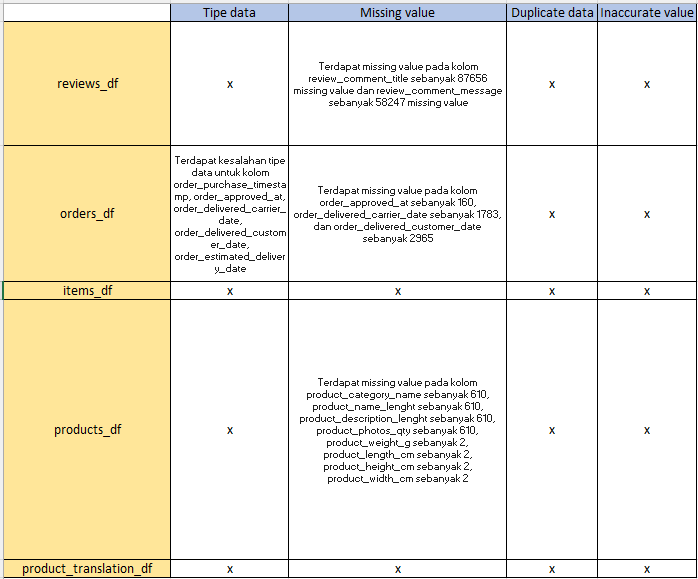

reviews_df
- Terdapat missing value pada kolom review_comment_title sebanyak 87656 missing value dan review_comment_message sebanyak 58247 missing value

orders_df
- Terdapat missing value pada kolom order_approved_at sebanyak 160, order_delivered_carrier_date	sebanyak 1783, dan order_delivered_customer_date sebanyak 2965
- Terdapat kesalahan tipe data untuk kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date

products_df
- Terdapat missing value pada kolom product_category_name sebanyak 610, product_name_lenght	sebanyak 610, product_description_lenght sebanyak 610, product_photos_qty sebanyak 610, product_weight_g sebanyak 2, product_length_cm sebanyak 2, product_height_cm sebanyak 2, product_width_cm sebanyak 2

### Cleaning Data

In [6]:
#REVIEWS
reviews_df[reviews_df.review_comment_title.isna()]
reviews_df.fillna(value="No Title", inplace=True)
reviews_df.isna().sum()
# reviews_df.info()

#ORDERS
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])

orders_df = orders_df[orders_df['order_status'] != 'canceled']
print(orders_df['order_status'].unique())
orders_df = orders_df.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'], how='any')
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].fillna(orders_df["order_approved_at"])
orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"])
orders_df[orders_df.order_approved_at.isna()]
orders_df.info()

#PRODUCTS
products_df[products_df.product_category_name.isna()]
products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], how='all', inplace=True)
products_df[products_df.product_weight_g.isna()]
products_df['product_weight_g'] = products_df.groupby('product_category_name')['product_weight_g'].transform(lambda x: x.fillna(x.median()))
products_df['product_length_cm'] = products_df.groupby('product_category_name')['product_length_cm'].transform(lambda x: x.fillna(x.median()))
products_df['product_height_cm'] = products_df.groupby('product_category_name')['product_height_cm'].transform(lambda x: x.fillna(x.median()))
products_df['product_width_cm'] = products_df.groupby('product_category_name')['product_width_cm'].transform(lambda x: x.fillna(x.median()))
products_df.isna().sum()


['delivered' 'invoiced' 'shipped' 'processing' 'unavailable' 'created'
 'approved']
<class 'pandas.core.frame.DataFrame'>
Index: 96470 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96470 non-null  object        
 1   customer_id                    96470 non-null  object        
 2   order_status                   96470 non-null  object        
 3   order_purchase_timestamp       96470 non-null  datetime64[ns]
 4   order_approved_at              96470 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96470 non-null  datetime64[ns]
 6   order_delivered_customer_date  96470 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96470 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

```
df_orders_cleaned = orders_df[orders_df['order_status'] != 'canceled']
```

digunakan untuk menyimpan baris data yang memiliki order_status selain canceled

```
orders_df = orders_df.dropna(subset=['order_delivered_customer_date', 'order_estimated_delivery_date'], how='any')
```

berfungsi untuk menghapus baris data yang memiliki value NaT pada salah satu dari dua kolom yang terdapat di dalam subset

```
orders_df["order_delivered_carrier_date"] = orders_df["order_delivered_carrier_date"].fillna(orders_df["order_approved_at"])
```
kode ini mengasumsikan bahwa pesanan segera dikirim setelah pembayaran disetujui

```
orders_df["order_approved_at"] = orders_df["order_approved_at"].fillna(orders_df["order_purchase_timestamp"])
```

kode ini mengasumsikan bahwa pembayaran langsung disetujui setelah pembelian


```
products_df.dropna(subset=['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty'], how='all', inplace=True)
```
digunakan untuk menghilangkan di products_df yang di mana datanya memang kosong sepenuhnya pada kolom yang tertera pada subset.

```
products_df['product_weight_g'] = products_df.groupby('product_category_name')['product_weight_g'].transform(lambda x: x.fillna(x.median()))
products_df['product_length_cm'] = products_df.groupby('product_category_name')['product_length_cm'].transform(lambda x: x.fillna(x.median()))
products_df['product_height_cm'] = products_df.groupby('product_category_name')['product_height_cm'].transform(lambda x: x.fillna(x.median()))
products_df['product_width_cm'] = products_df.groupby('product_category_name')['product_width_cm'].transform(lambda x: x.fillna(x.median()))
```
digunakan untuk mengganti nilai NaN pada kolom product_weight_g, product_length_cm, product_height_cm, product_width_cm dengan median berdasarkan kategori produk.

**Insight:**
- pada awalnya kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date bertipe data object, kemudian diubah menjadi datetime
- missing value di orders_df ada yang disebabkan karena order tersebut memiliki status 'canceled' sehingga memang tidak memiliki value untuk kolom order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

## Exploratory Data Analysis (EDA)

### Explore ...

In [7]:
orders_reviews_df = pd.merge(
    left=orders_df,
    right=reviews_df,
    how="inner",
    on="order_id"
)
# orders_reviews_df.head()

orders_reviews_items_df = pd.merge(
    left=orders_reviews_df,
    right=items_df,
    how="inner",
    on="order_id"
)
# orders_reviews_items_df.head()

orders_reviews_items_products_df = pd.merge(
    left=orders_reviews_items_df,
    right=products_df,
    how="inner",
    on="product_id"
)
# orders_reviews_items_products_df.head()

final_df = pd.merge(
    left=orders_reviews_items_products_df,
    right=product_translation_df,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
final_df.info()

final_df.to_csv("final_data.csv", index=False)

final_df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108472 entries, 0 to 108471
Data columns (total 29 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       108472 non-null  object        
 1   customer_id                    108472 non-null  object        
 2   order_status                   108472 non-null  object        
 3   order_purchase_timestamp       108472 non-null  datetime64[ns]
 4   order_approved_at              108472 non-null  datetime64[ns]
 5   order_delivered_carrier_date   108472 non-null  datetime64[ns]
 6   order_delivered_customer_date  108472 non-null  datetime64[ns]
 7   order_estimated_delivery_date  108472 non-null  datetime64[ns]
 8   review_id                      108472 non-null  object        
 9   review_score                   108472 non-null  int64         
 10  review_comment_title           108472 non-null  object        
 11  

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,pet_shop
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,e50934924e227544ba8246aeb3770dd4,5,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,stationery


**Insight:**
- dataset final merupakan tabel akhir atau hasil dari merge antara 5 dataset

## Visualization & Explanatory Analysis

In [8]:
final_df = pd.read_csv("dashboard/final_data.csv")

### Pertanyaan 1: Kategori produk apa yang memiliki rating review paling baik dan buruk?

C:\Users\Hana\AppData\Local\Temp\ipykernel_7916\1491657729.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=top_10_best, palette="Blues_r", ax=ax[0])
C:\Users\Hana\AppData\Local\Temp\ipykernel_7916\1491657729.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="review_score", y="product_category_name_english", data=top_10_worst, palette="Reds_r", ax=ax[1])


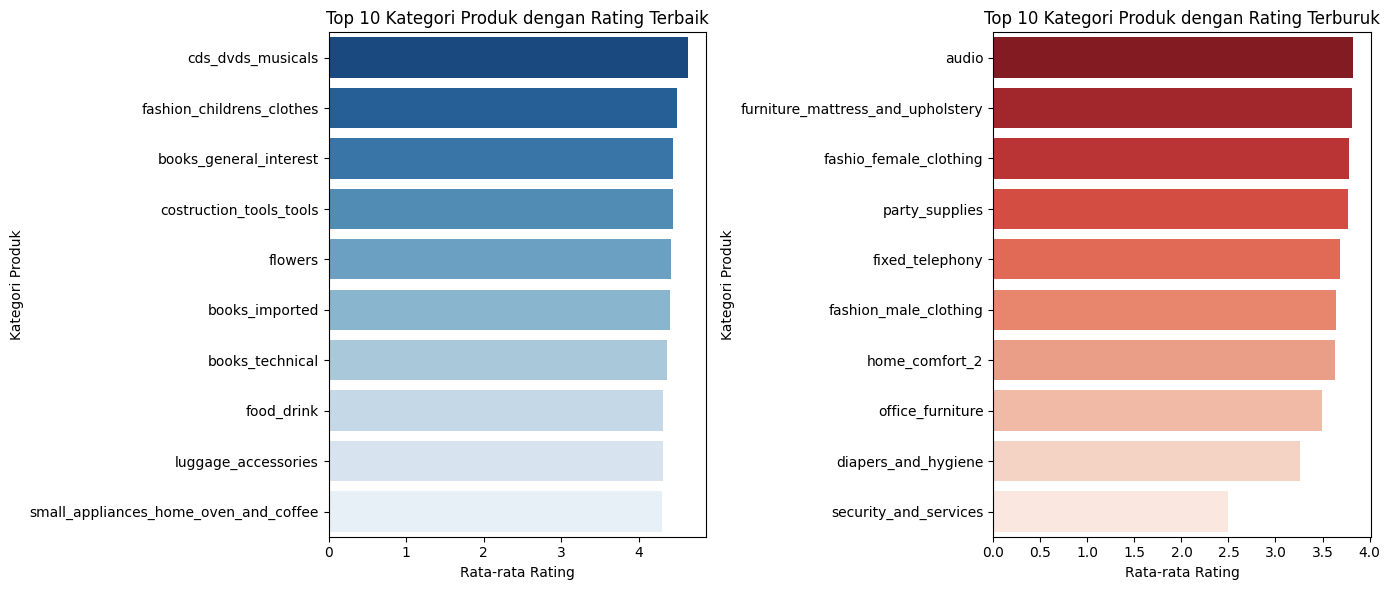

In [9]:
rating_per_category = final_df.groupby("product_category_name_english")["review_score"].mean().reset_index()

rating_per_category = rating_per_category.sort_values(by="review_score", ascending=False)

top_10_best = rating_per_category.head(10)
top_10_worst = rating_per_category.tail(10)

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

sns.barplot(x="review_score", y="product_category_name_english", data=top_10_best, palette="Blues_r", ax=ax[0])
ax[0].set_title("Top 10 Kategori Produk dengan Rating Terbaik")
ax[0].set_xlabel("Rata-rata Rating")
ax[0].set_ylabel("Kategori Produk")

sns.barplot(x="review_score", y="product_category_name_english", data=top_10_worst, palette="Reds_r", ax=ax[1])
ax[1].set_title("Top 10 Kategori Produk dengan Rating Terburuk")
ax[1].set_xlabel("Rata-rata Rating")
ax[1].set_ylabel("Kategori Produk")

plt.tight_layout()
plt.show()


### Pertanyaan 2: Apakah ada pola keterlambatan pengiriman berdasarkan kategori keterlambatan?

C:\Users\Hana\AppData\Local\Temp\ipykernel_7916\2676654634.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  delay_counts = final_df.groupby(["product_category_name_english", "delivery_category"]).size().unstack()


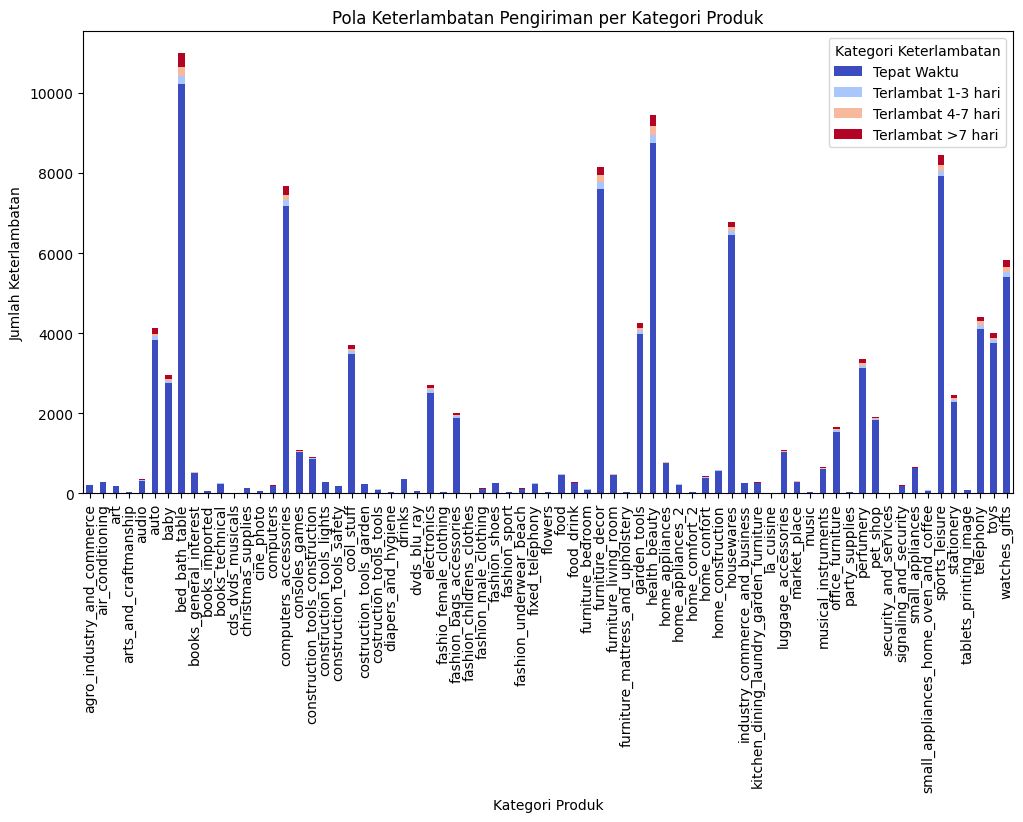

In [10]:
final_df["order_delivered_customer_date"] = pd.to_datetime(final_df["order_delivered_customer_date"])
final_df["order_estimated_delivery_date"] = pd.to_datetime(final_df["order_estimated_delivery_date"])

final_df["delivery_delay_days"] = (final_df["order_delivered_customer_date"] - final_df["order_estimated_delivery_date"]).dt.days

bins = [-999, 0, 3, 7, 999]
labels = ["Tepat Waktu", "Terlambat 1-3 hari", "Terlambat 4-7 hari", "Terlambat >7 hari"]
final_df["delivery_category"] = pd.cut(final_df["delivery_delay_days"], bins=bins, labels=labels)

delay_counts = final_df.groupby(["product_category_name_english", "delivery_category"]).size().unstack()

delay_counts.plot(kind="bar", stacked=True, figsize=(12, 6), colormap="coolwarm")
plt.xlabel("Kategori Produk")
plt.ylabel("Jumlah Keterlambatan")
plt.title("Pola Keterlambatan Pengiriman per Kategori Produk")
plt.legend(title="Kategori Keterlambatan")
plt.show()


In [ ]:
!streamlit run dashboard/app.py

**Insight:**
- 10 kategori dengan rating terbaik secara berturut-turut yaitu fashion_childrens_clothes, cds_dvds_musicals, books_general_interest, books_imported, construction_tools_tools, small_appliances_home_oven_and_coffee, flowers, books_technical, food_drink, fashion_sport.
- 10 kategori dengan rating terburuk yaitu furniture_mattress_and_upholstery, home_confort, dan party_supplies, audio, fixed_telephony, home_comfort_2, office_furniture, diapers_and hygine, security_and_service.

## Conclusion

- Kategori dengan rating terbaik yaitu fashion_childrens_clothes menunjukkan bahwa konsumen merasa puas dengan produk-produk dalam kategori tersebut. 
- Kategori dengan rating terburuk yaitu furniture_mattress_and_upholstery dimungkinkan karena adanya masalah pada kualitas produk, layanan atau hal lain yang berkaitan dengan kepuasan pelanggan.